In [5]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [153]:
pip install scikit-learn==1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 47.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 58.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| housing | has housing loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [6]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [47]:
# code here
df = pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/ML2.2_ensemble_methods_intro-20230502T071113Z-001/ML2.2_ensemble_methods_intro/data/bank-full.csv',sep=";",na_values= "unknown") 

Describe the dataset informations

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.nunique

<bound method DataFrame.nunique of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact

Use histogramms to display the features' distribution

<AxesSubplot:>

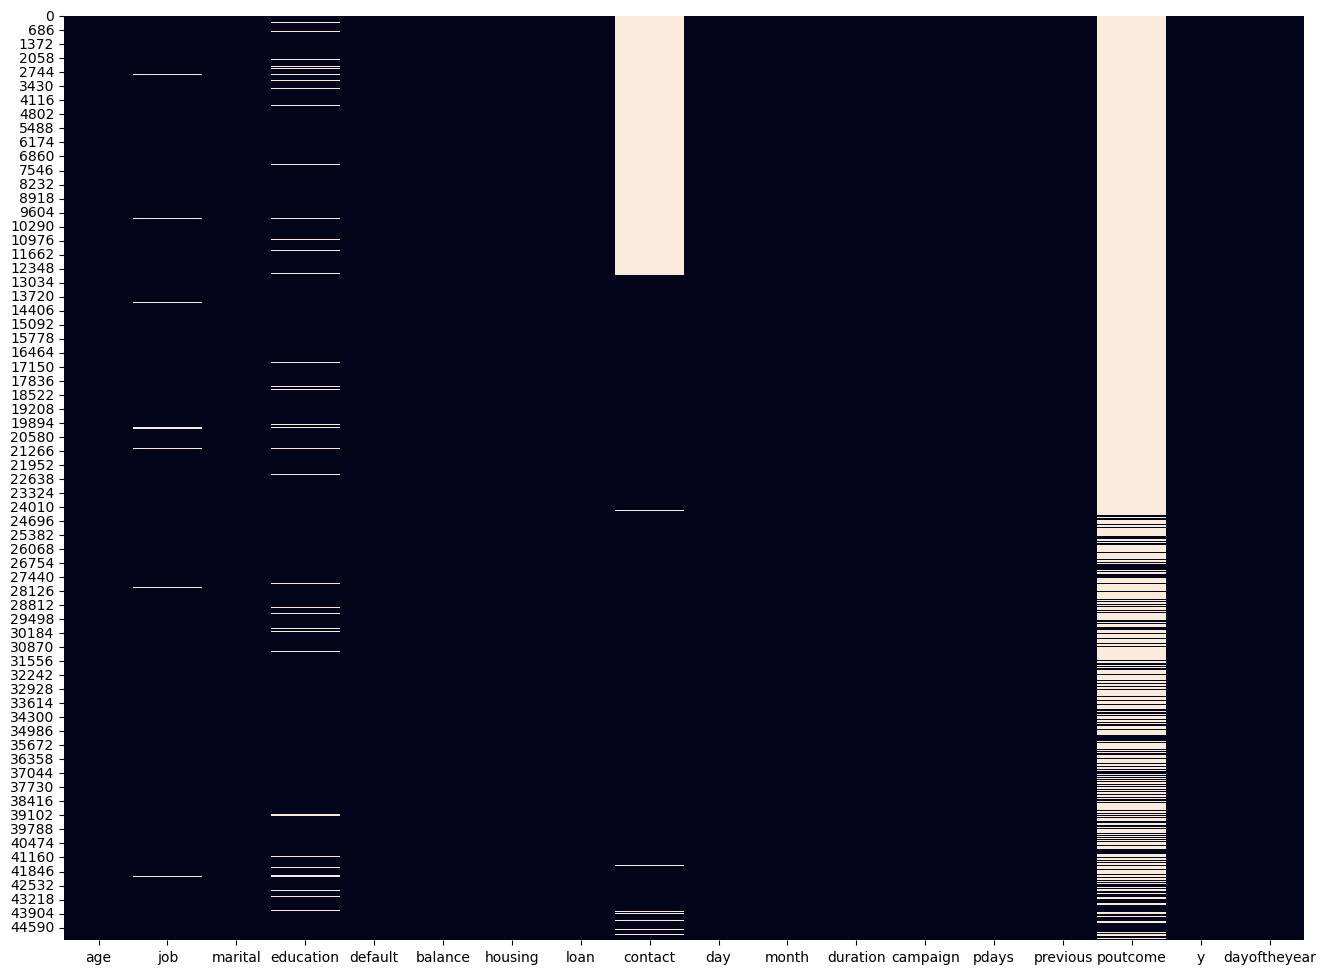

In [31]:
sns.heatmap(df.isnull(), cbar=False)

In [33]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = df.isnull().sum() * 100 / len(df)
print(round(percent_missing,2))

age              0.00
job              0.64
marital          0.00
education        4.11
default          0.00
balance          0.00
housing          0.00
loan             0.00
contact         28.80
day              0.00
month            0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome        81.75
y                0.00
dayoftheyear     0.00
dtype: float64


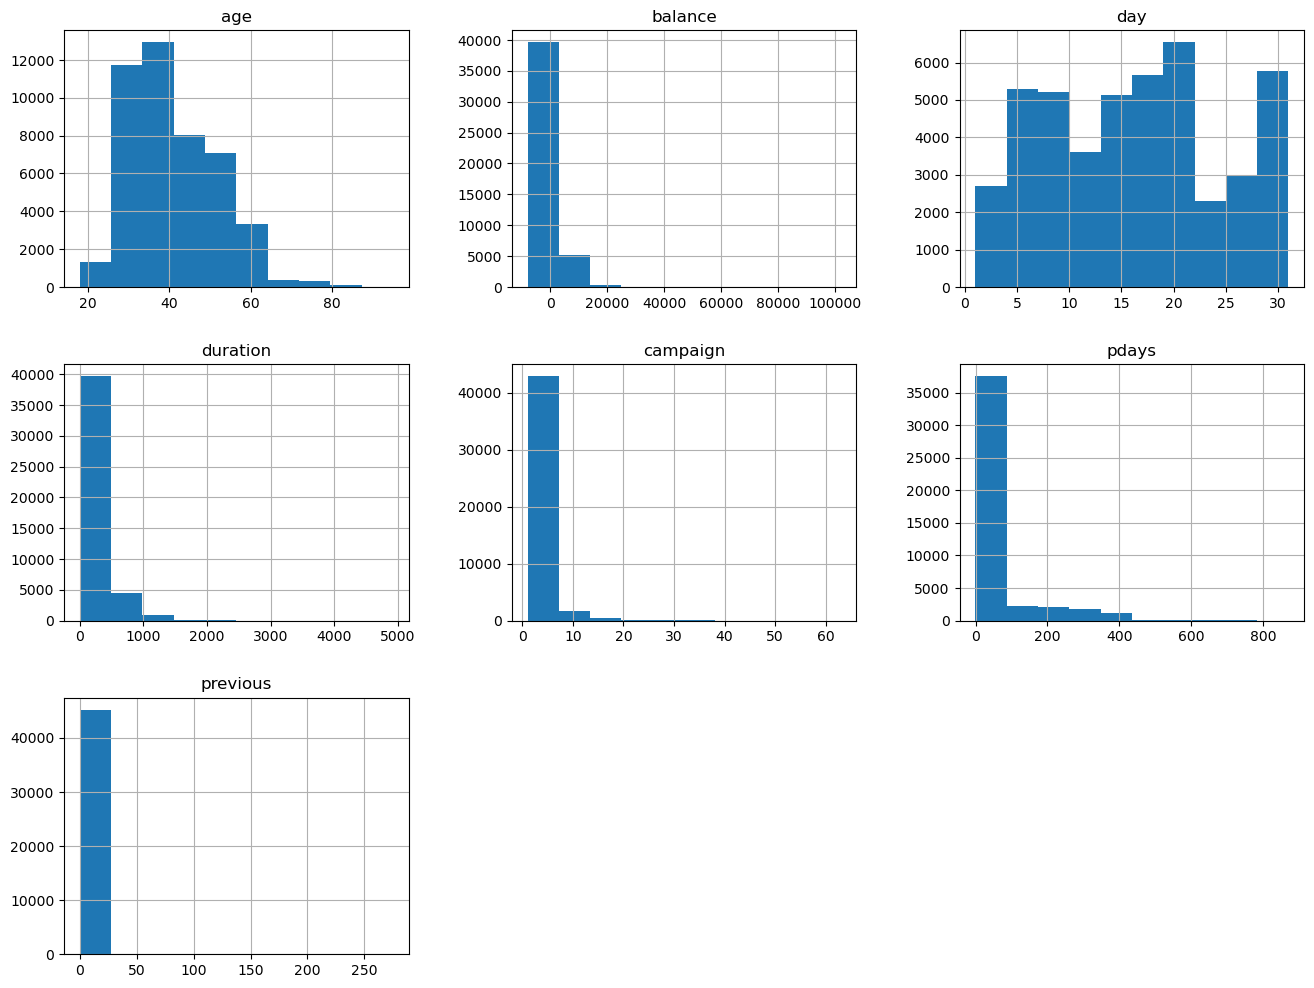

In [28]:
rcParams['figure.figsize'] = 16,12
plots = df.hist()

Use heatmap to display the numerical features' correlation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='PiYG')

plt.show();

NameError: name 'df' is not defined

In order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [95]:
#code here
df['dayoftheyear'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-1984')
df.pop('day')
df.pop('month')

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [96]:
df['dayoftheyear']=df['dayoftheyear'].dt.dayofyear

Now sort the features into categorical and numerical features

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'dayoftheyear'],
      dtype='object')

In [13]:
categorical_features = [ 'job', 'marital', 'education', 'default', 'housing','loan', 'contact',
                        'poutcome'] # to be completed
numerical_features = ['age','balance', 'pdays','previous', 'campaign','dayoftheyear'] # to be completed

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase.

The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohot_encoder = OneHotEncoder(sparse=False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.compose import ColumnTransformer

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant")),
    ('ohe',OneHotEncoder(handle_unknown='ignore', sparse=False)
)
])

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="mean")),
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])


full_pipeline = ColumnTransformer(transformers=[
 ("num", num_pipeline, numerical_features),
 ("cat", cat_pipeline, categorical_features),
 ])


In [61]:
df_transformed = full_pipeline.fit_transform(df)
full_names = full_pipeline.get_feature_names_out()

AttributeError: Estimator imputer does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

In [79]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [8]:
    df = pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/ML2.2_ensemble_methods_intro-20230502T071113Z-001/ML2.2_ensemble_methods_intro/data/bank-full.csv',sep=";",na_values= "unknown") 
    
    df['dayoftheyear'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-1984')
    df['dayoftheyear']=df['dayoftheyear'].dt.dayofyear
    df.pop('day')
    df.pop('month')
    

0        may
1        may
2        may
3        may
4        may
        ... 
45206    nov
45207    nov
45208    nov
45209    nov
45210    nov
Name: month, Length: 45211, dtype: object

In [10]:
from sklearn.model_selection import train_test_split


def pipe_and_split(rand): 
    df = pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/ML2.2_ensemble_methods_intro-20230502T071113Z-001/ML2.2_ensemble_methods_intro/data/bank-full.csv',sep=";",na_values= "unknown") 
    
    df['dayoftheyear'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-1984')
    df['dayoftheyear']=df['dayoftheyear'].dt.dayofyear
    df.pop('day')
    df.pop('month')
    df.pop('duration')
    
    X= df
    y = df.pop('y')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rand)
    
# Convert the transformed NumPy array back to a DataFrame with proper column names
    X_train_tr = full_pipeline.fit_transform(X_train)
    X_test_tr = full_pipeline.transform(X_test)
    full_names = full_pipeline.get_feature_names_out()
    df2 = pd.DataFrame(X_train_tr, columns=full_names)
    df2_final = pd.DataFrame(X_test_tr, columns=full_names)
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)
    y_train=pd.DataFrame(y_train)
    y_test=pd.DataFrame(y_test)
    return df2,df2_final,y_train,y_test
    

In [16]:
df2,df2_final,y_train,y_test=pipe_and_split(42)
clf = DecisionTreeClassifier(random_state=123,max_depth=3)
clf.fit(df2, y_train)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


NameError: name 'LabelEncoder' is not defined

In [78]:
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
33903,1
33904,0
33905,0
33906,0


Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

In [18]:
df2,df2_final,y_train,y_test=pipe_and_split(28)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
df2

,num__age,num__balance,num__pdays,num__previous,num__campaign,num__dayoftheyear,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,...,cat__housing_yes,cat__loan_no,cat__loan_yes,cat__contact_cellular,cat__contact_missing_value,cat__contact_telephone,cat__poutcome_failure,cat__poutcome_missing_value,cat__poutcome_other,cat__poutcome_success
0,0.943906,0.979877,-0.410568,-0.239080,-0.568611,-0.630437,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.131924,-0.381649,-0.410568,-0.239080,0.078059,2.010070,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.842262,-0.530239,2.754748,8.025489,-0.568611,-0.603630,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.466227,-0.447984,-0.410568,-0.239080,-0.568611,-0.201522,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.748253,-0.449642,-0.410568,-0.239080,0.401394,0.790343,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,-0.372218,0.135101,-0.410568,-0.239080,-0.245276,-0.161311,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
33904,0.285844,4.116196,-0.410568,-0.239080,-0.568611,-0.295347,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
33905,0.379853,0.775565,1.472595,1.000606,-0.245276,2.036877,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
33906,0.849897,-0.363075,-0.410568,-0.239080,-0.245276,-0.429383,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [139]:
df2

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.943906,0.979877,-0.410568,-0.239080,-0.568611,-0.630437,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.131924,-0.381649,-0.410568,-0.239080,0.078059,2.010070,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.842262,-0.530239,2.754748,8.025489,-0.568611,-0.603630,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.466227,-0.447984,-0.410568,-0.239080,-0.568611,-0.201522,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.748253,-0.449642,-0.410568,-0.239080,0.401394,0.790343,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,-0.372218,0.135101,-0.410568,-0.239080,-0.245276,-0.161311,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
33904,0.285844,4.116196,-0.410568,-0.239080,-0.568611,-0.295347,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
33905,0.379853,0.775565,1.472595,1.000606,-0.245276,2.036877,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
33906,0.849897,-0.363075,-0.410568,-0.239080,-0.245276,-0.429383,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss.
2. A model, that performs well.

In order to highlight decision trees advantages and drawbacks, remove the `duration` column from the `X` dataset.

In [0]:
# remove duration column

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [0]:
# train_test split
# X_train, X_test, y_train, y_test = None

### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123,max_depth=3)
clf.fit(df2, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

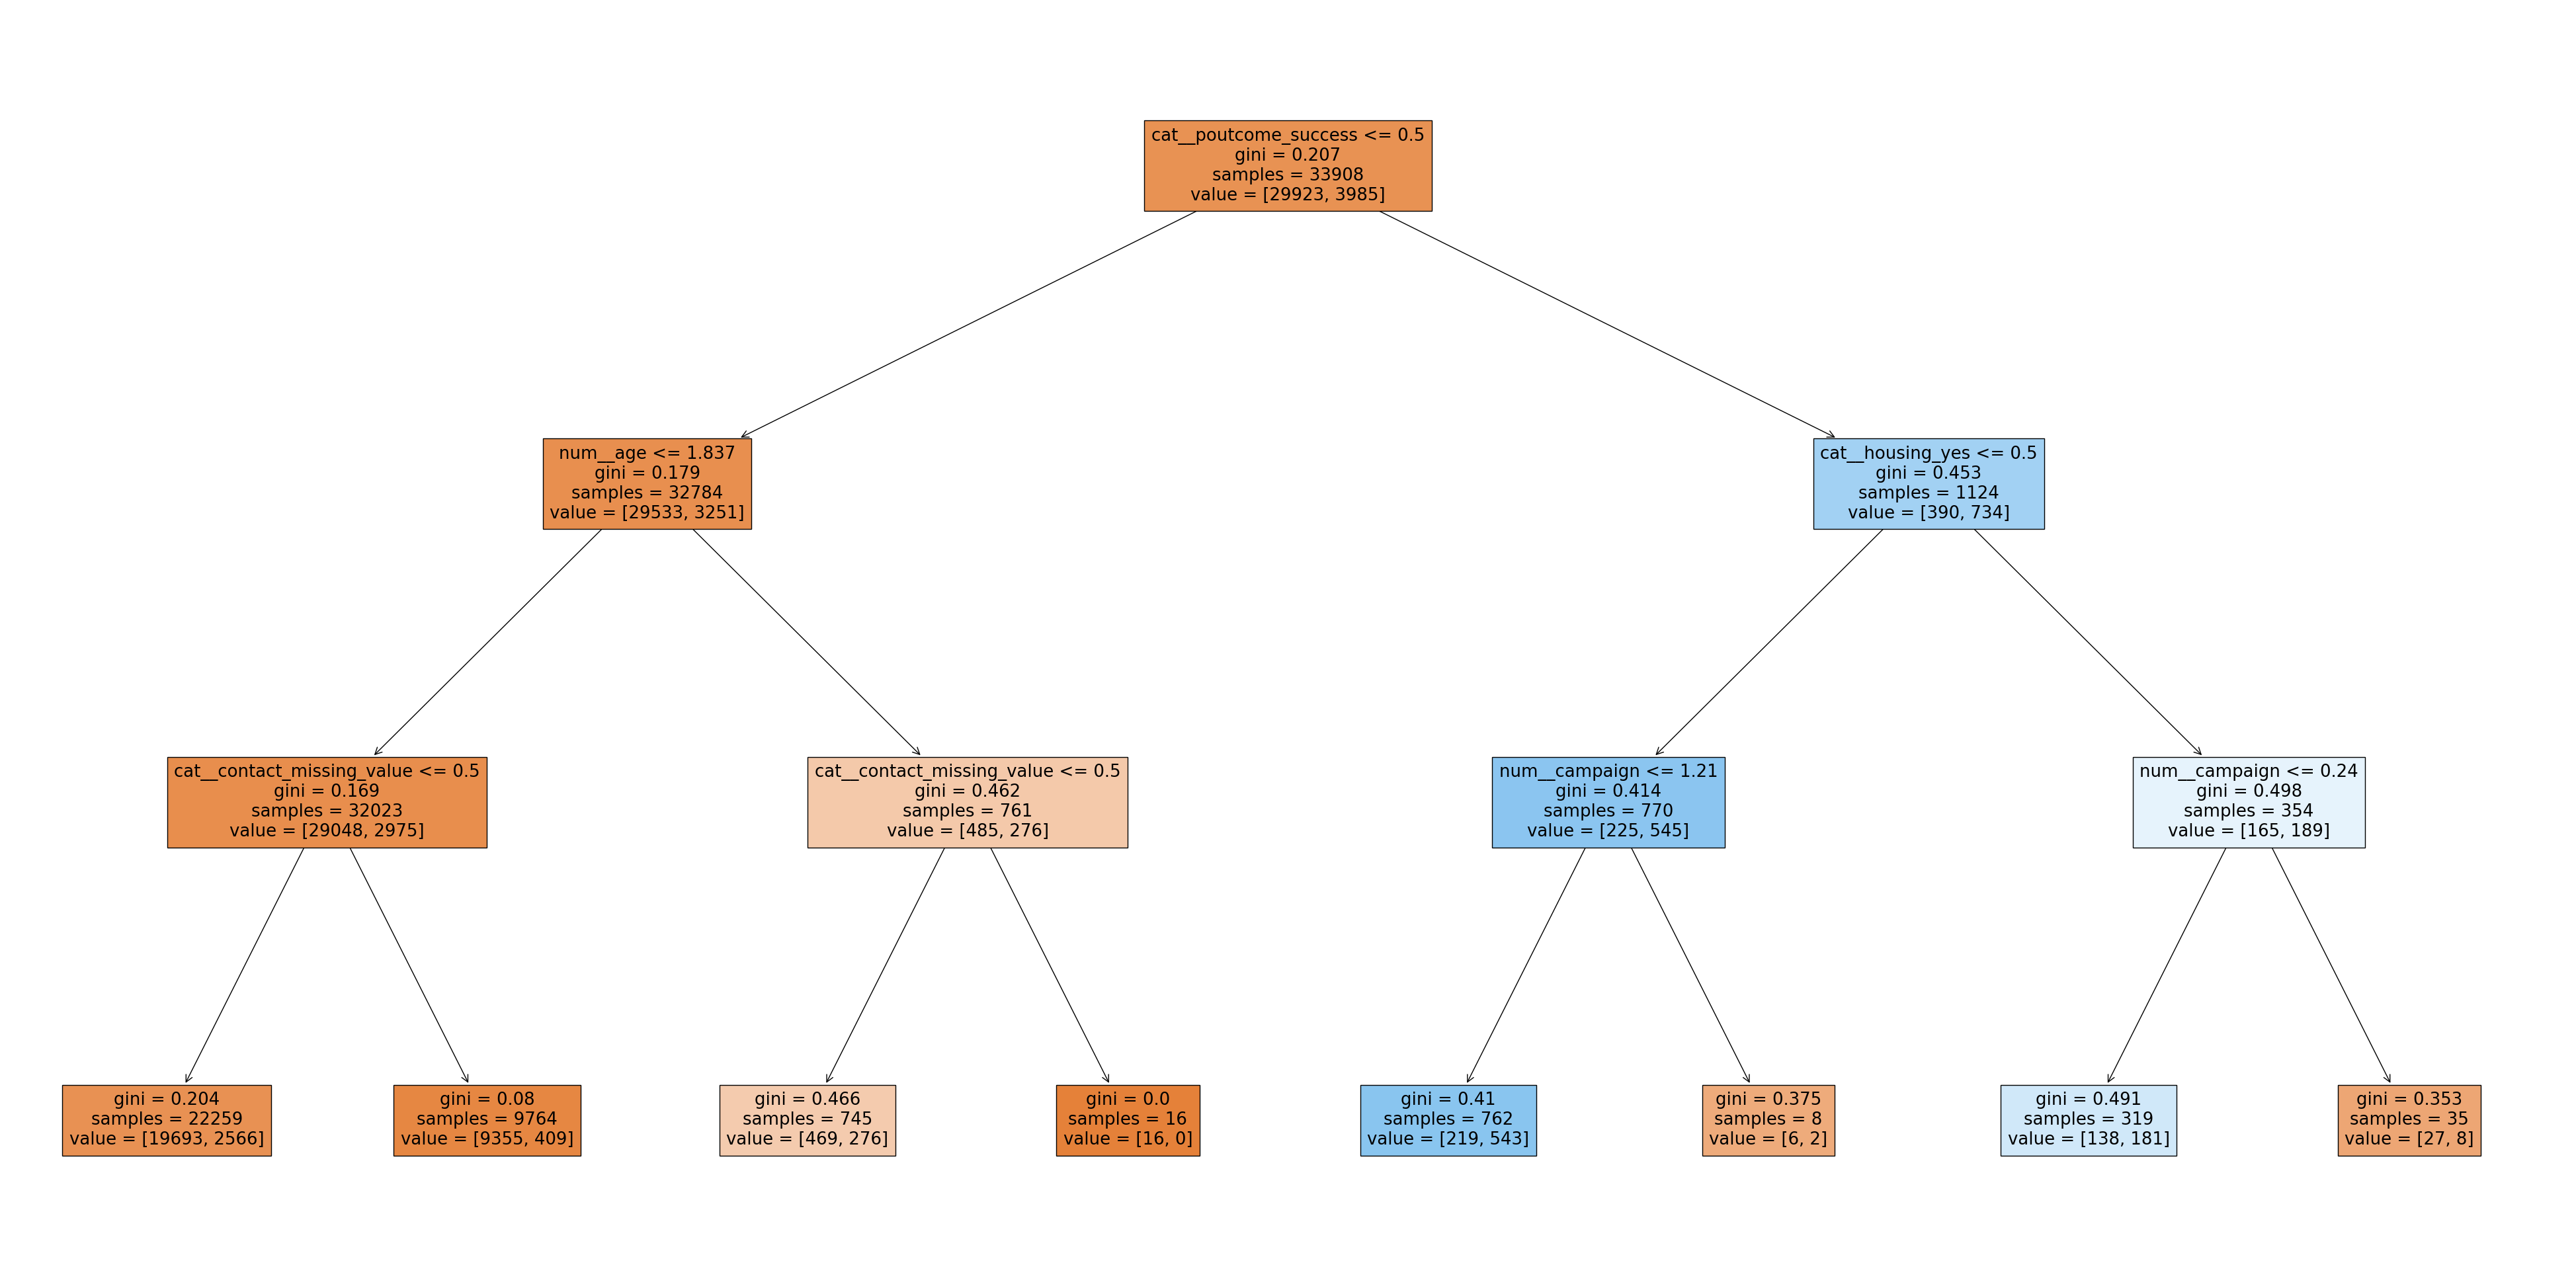

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25))
plot_tree(clf, feature_names=df2.columns, filled=True)
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [80]:
df2,df2_final,y_train,y_test=pipe_and_split(48)
clf = DecisionTreeClassifier(random_state=123,max_depth=3)
clf.fit(df2, y_train)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DecisionTreeClassifier(max_depth=3, random_state=123)

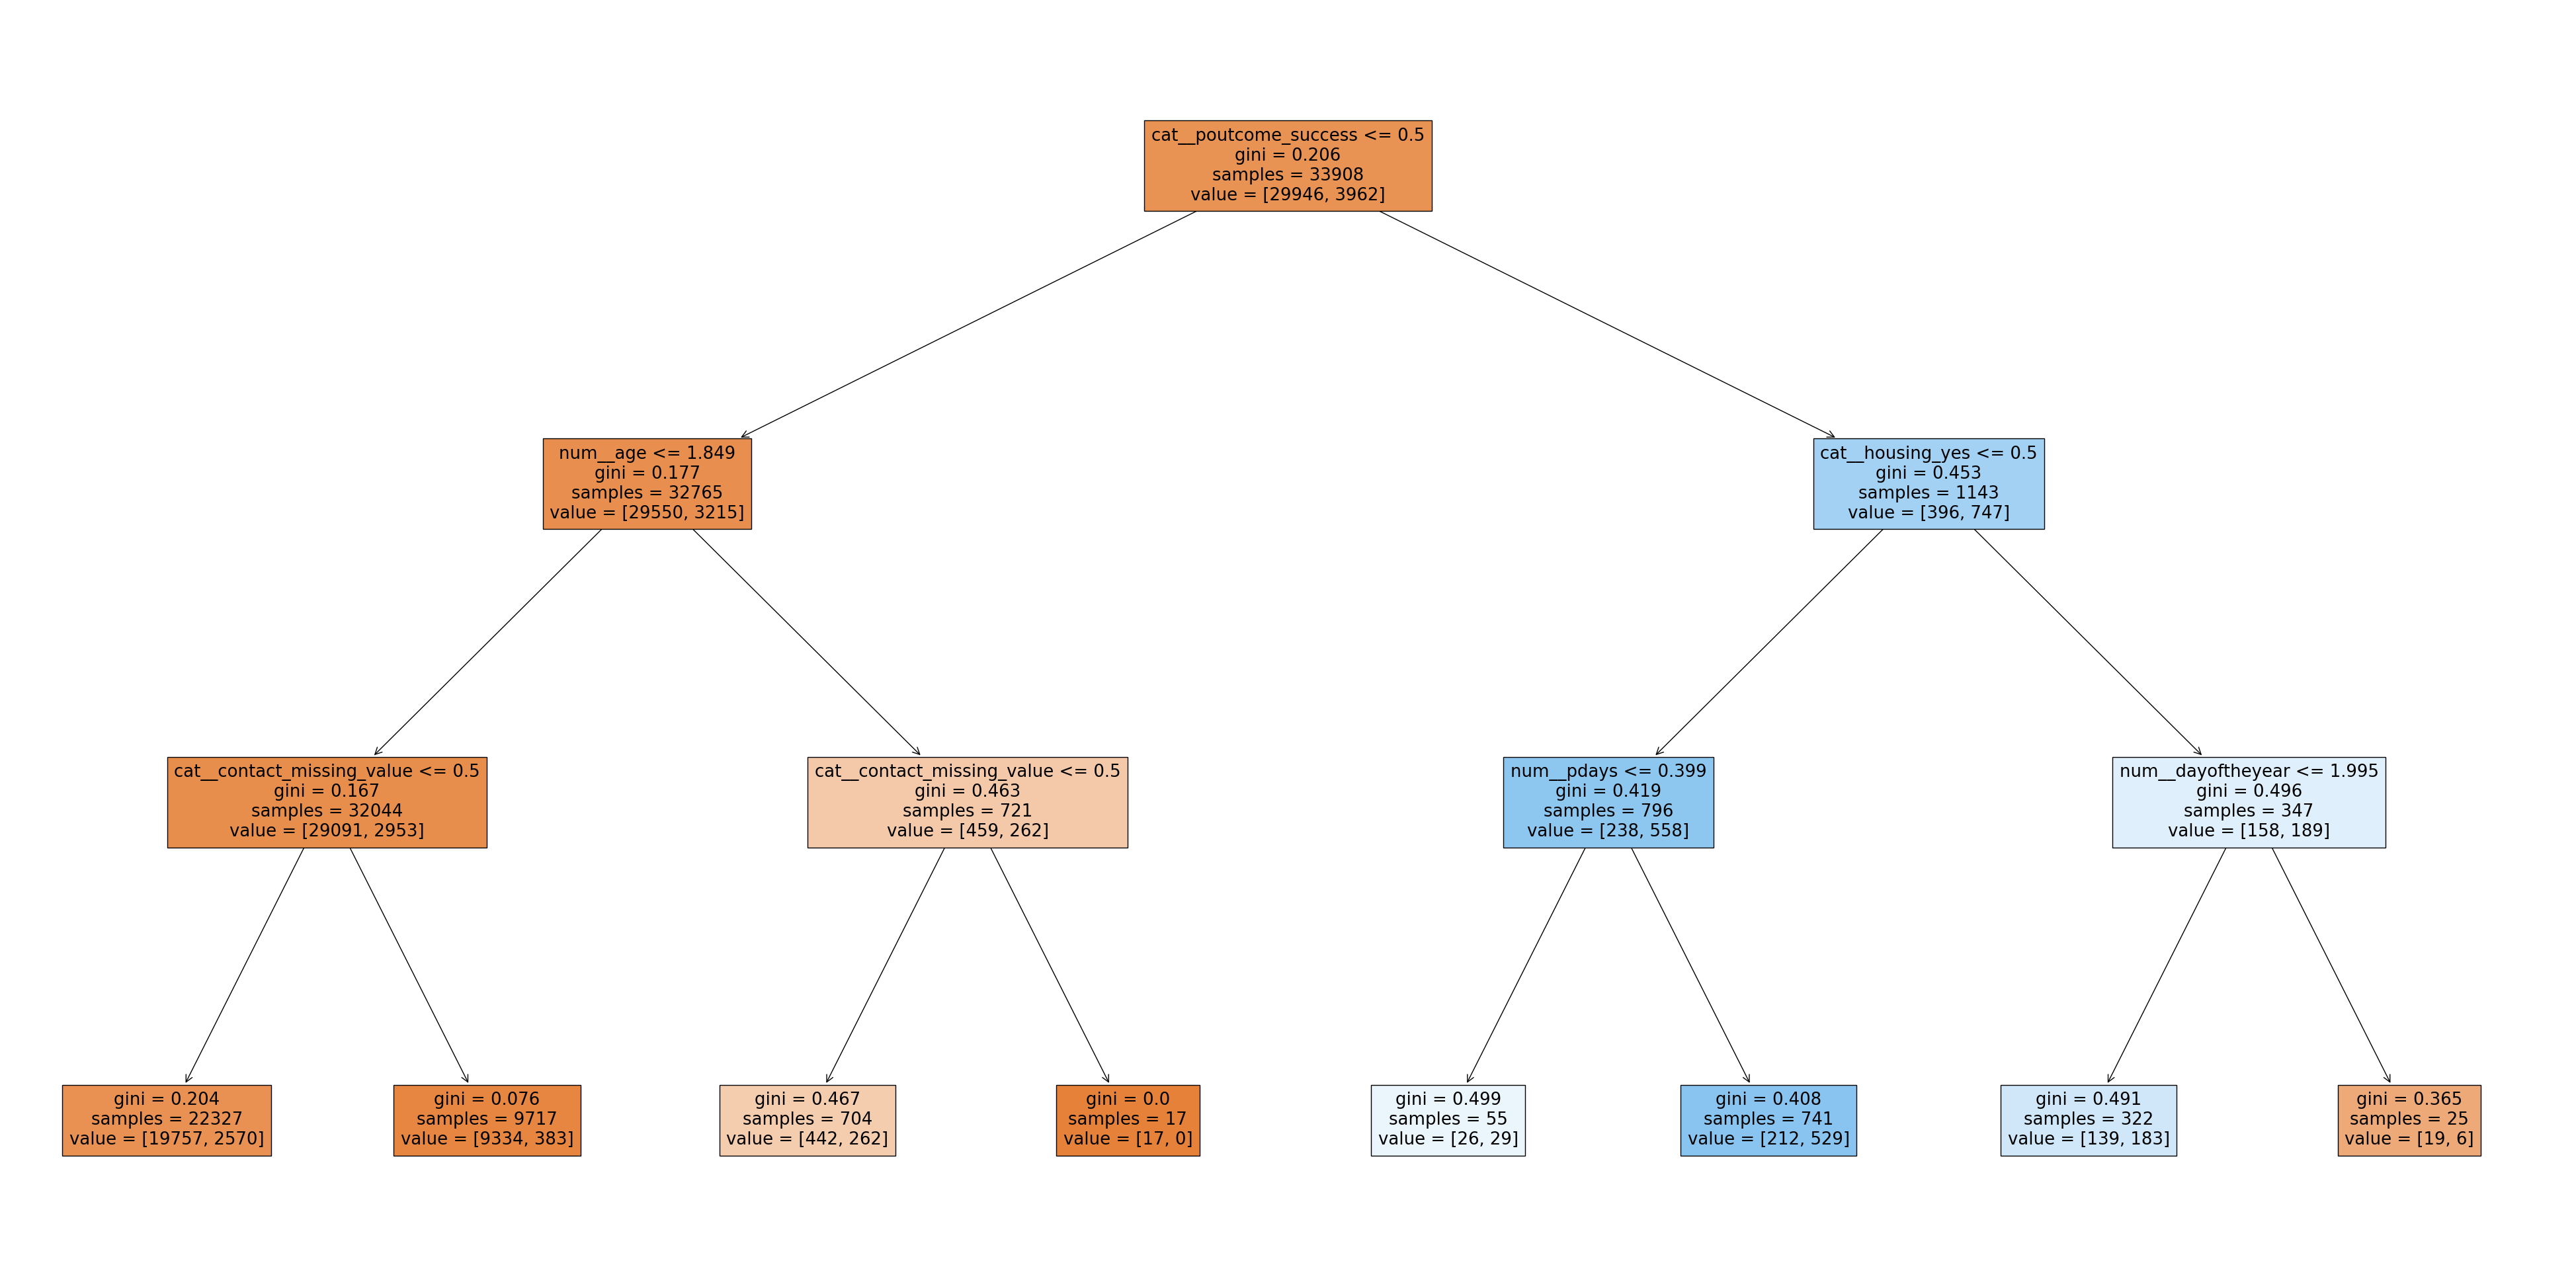

In [14]:
plt.figure(figsize=(50,25))
plot_tree(clf, feature_names=df2.columns, filled=True)
plt.show()

Text(0.5, 1.0, 'Count of each Target Class')

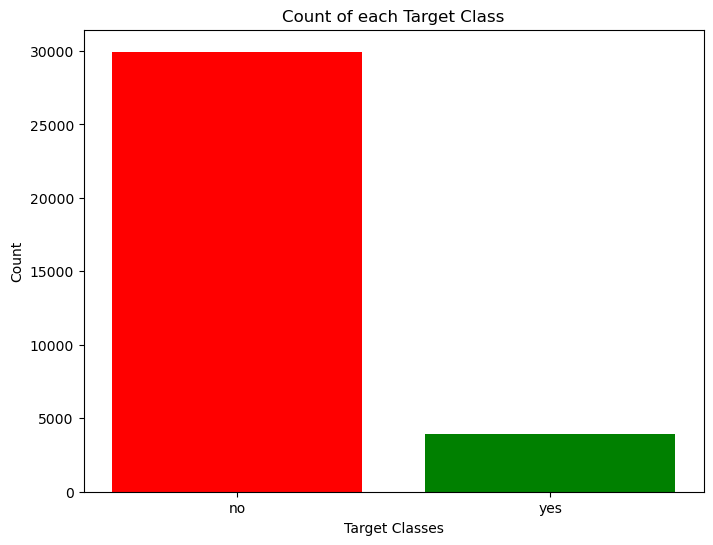

In [60]:
rcParams['figure.figsize'] = 8,6
plt.bar(y_train['y'].unique(), y_train['y'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [32]:
params = {
    'max_depth': [3,5, 10],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [ 3,5,10]
}

What can you tell about the two trees?

*answer here*

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [0]:
# Cross validation on Decision trees

In [26]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss


scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'auc': 'roc_auc',
}

cv_results = cross_validate(clf, df2, y_train, scoring=scoring, cv=10)

# Print the mean scores for each metric
print('Accuracy:', cv_results['test_accuracy'].mean())
print('Precision:', cv_results['test_precision'].mean())
print('Recall:', cv_results['test_recall'].mean())
print('F1:', cv_results['test_f1'].mean())
print('AUC:', cv_results['test_auc'].mean())

NameError: name 'clf' is not defined

In [83]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                   scoring=scoring,
                   return_train_score=True,
                    refit='f1')
#
# Fit the modelgrid = GridSearchCV(clf, param_grid, scoring=scoring, cv=10, refit='f1')
#
grid.fit(df2, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_l

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_d

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=3; total time=  

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=123),
             n_jobs=1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [3, 5, 10]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'auc': 'roc_auc',
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [84]:
print(grid.best_score_, grid.best_params_)

0.3063010084088363 {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

In [17]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_prob = clf.predict_proba(df2)
y_prob = [sub_list[1] for sub_list in y_prob]
y_prob = np.array(y_prob)

NameError: name 'y_train' is not defined

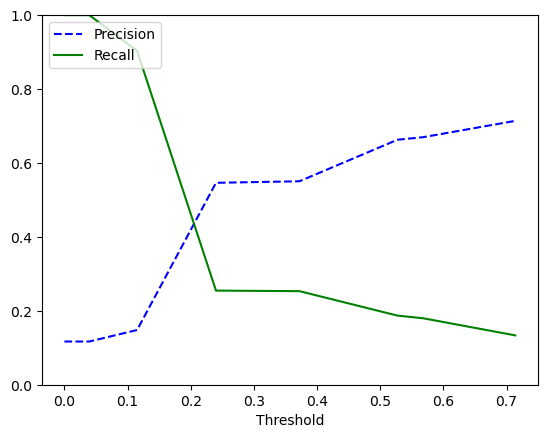

In [45]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

precisions, recalls, thresholds = precision_recall_curve(y_train,y_prob)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


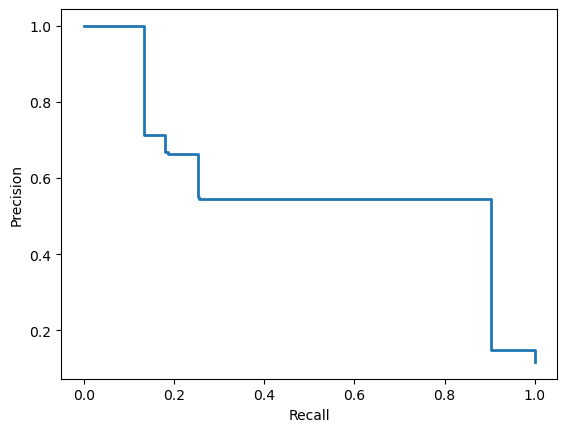

In [46]:
def plot_precision_recall_curve(precisions, recalls):
    plt.step(recalls, precisions, linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
plot_precision_recall_curve(precisions, recalls)

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

<AxesSubplot:>

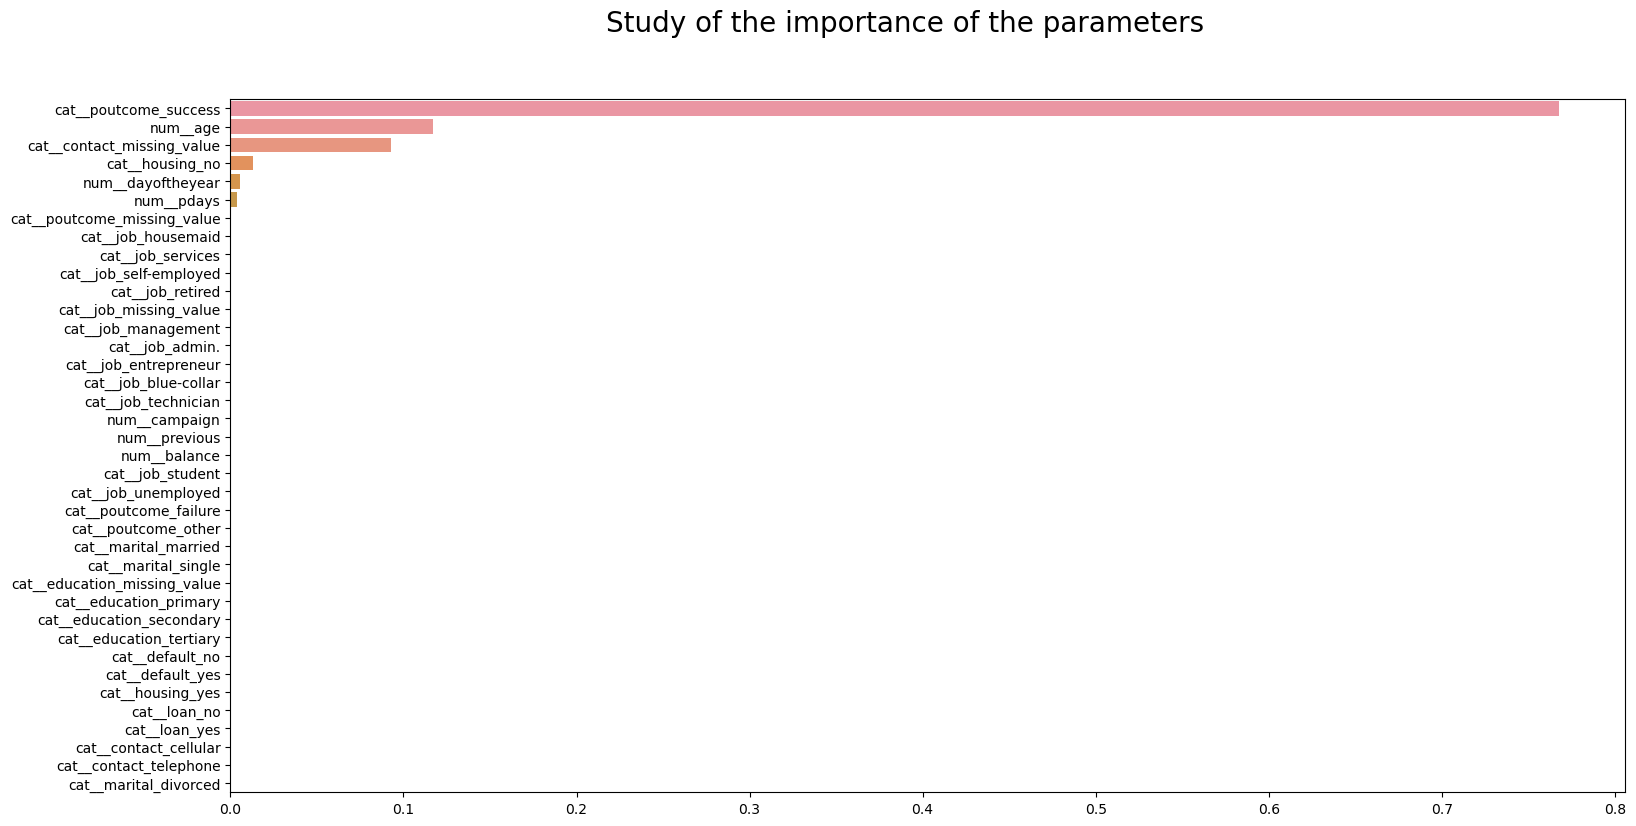

In [86]:
import seaborn as sns
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,9))
fig.suptitle("Study of the importance of the parameters", fontsize=20)

sns.barplot(
    ax=ax,
    x=importances[sorted_indices], 
    y=df2.columns[sorted_indices],


)

In [85]:
df2,df2_final,y_train,y_test=pipe_and_split(49)
clf = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf= 3, min_samples_split= 3)
clf.fit(df2, y_train)



/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=3,
                       random_state=42)

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [87]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.transform(y_test)
y_pred = grid.predict(df2_final)
y_pred= encoder.transform(y_pred)
f1 = f1_score(y_test, y_pred)
print('F1 score on test set:', f1)


F1 score on test set: 0.3594994311717861


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [135]:
df2,df2_final,y_train,y_test=pipe_and_split(42)


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [133]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [136]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
clf = RandomForestClassifier(random_state=0,class_weight ='balanced_subsample')
y_train = y_train.values.ravel()

clf.fit(df2, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

In [142]:
param = {'max_depth': [  6,10,20],'n_estimators': [ 20, 30,40]
}

In [143]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=clf,
                    param_grid=param,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                   scoring=scoring,
                   return_train_score=True,
                    refit='f1')
# create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='f1',return_train_score=True)



#
grid.fit(df2, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.4s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=30; total time=   0.5s
[CV] END .......................max_depth=6, n_e

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [6, 10, 20],
                         'n_estimators': [20, 30, 40]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'auc': 'roc_auc',
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [144]:
print(grid.best_score_, grid.best_params_)

0.4175061097977702 {'max_depth': 10, 'n_estimators': 20}


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [167]:
df2,df2_final,y_train,y_test=pipe_and_split(42)
clf = RandomForestClassifier(random_state=0,max_depth= 10, n_estimators= 20,class_weight ='balanced_subsample')
y_train = y_train.values.ravel()

clf.fit(df2, y_train)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=20, random_state=0)

In [168]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.transform(y_test)
y_pred = clf.predict(df2_final)
y_pred= encoder.transform(y_pred)
f1 = f1_score(y_test, y_pred)
print('F1 score on test set:', f1)

F1 score on test set: 0.4193279644543182


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

<AxesSubplot:>

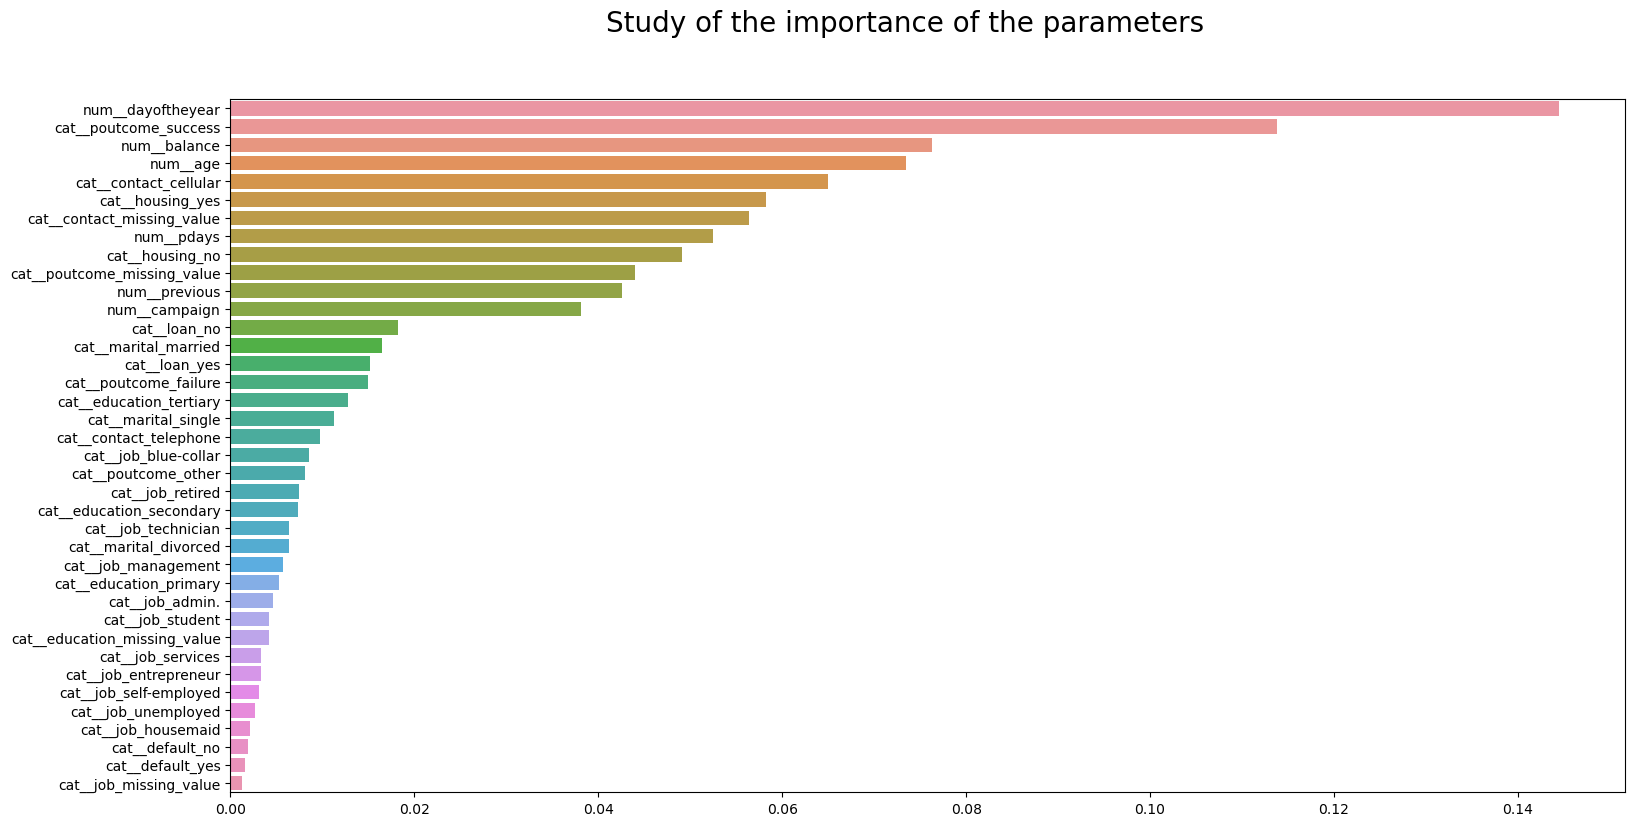

In [148]:
import seaborn as sns
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,9))
fig.suptitle("Study of the importance of the parameters", fontsize=20)

sns.barplot(
    ax=ax,
    x=importances[sorted_indices], 
    y=df2.columns[sorted_indices],


)

In [153]:
df2.columns[sorted_indices]

Index(['num__dayoftheyear', 'cat__poutcome_success', 'num__balance',
       'num__age', 'cat__contact_cellular', 'cat__housing_yes',
       'cat__contact_missing_value', 'num__pdays', 'cat__housing_no',
       'cat__poutcome_missing_value', 'num__previous', 'num__campaign',
       'cat__loan_no', 'cat__marital_married', 'cat__loan_yes',
       'cat__poutcome_failure', 'cat__education_tertiary',
       'cat__marital_single', 'cat__contact_telephone', 'cat__job_blue-collar',
       'cat__poutcome_other', 'cat__job_retired', 'cat__education_secondary',
       'cat__job_technician', 'cat__marital_divorced', 'cat__job_management',
       'cat__education_primary', 'cat__job_admin.', 'cat__job_student',
       'cat__education_missing_value', 'cat__job_services',
       'cat__job_entrepreneur', 'cat__job_self-employed',
       'cat__job_unemployed', 'cat__job_housemaid', 'cat__default_no',
       'cat__default_yes', 'cat__job_missing_value'],
      dtype='object')

In [173]:
df2,df2_final,y_train,y_test=pipe_and_split(42)
clf = RandomForestClassifier(random_state=0,max_depth= 10, n_estimators= 20,class_weight ='balanced_subsample')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [174]:
df3 = df2[['num__dayoftheyear', 'cat__poutcome_success', 'num__balance',
       'num__age', 'cat__contact_cellular', 'cat__housing_yes',
       'cat__contact_missing_value', 'num__pdays', 'cat__housing_no',
       'cat__poutcome_missing_value', 'num__previous', 'num__campaign']]
df3_final = df2_final[['num__dayoftheyear', 'cat__poutcome_success', 'num__balance',
       'num__age', 'cat__contact_cellular', 'cat__housing_yes',
       'cat__contact_missing_value', 'num__pdays', 'cat__housing_no',
       'cat__poutcome_missing_value', 'num__previous', 'num__campaign']]

In [182]:
clf.fit(df3, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=20, random_state=0)

In [183]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=clf,
                    param_grid=param,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                   scoring=scoring,
                   return_train_score=True,
                    refit='f1')
# create the GridSearchCV object



#
grid.fit(df3, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.5s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=20; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=30; total time=   0.4s
[CV] END .......................max_depth=6, n_e

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              max_depth=10, n_estimators=20,
                                              random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [6, 10, 20],
                         'n_estimators': [20, 30, 40]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'auc': 'roc_auc',
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [184]:
print(grid.best_score_, grid.best_params_)

0.44715985581372336 {'max_depth': 10, 'n_estimators': 40}


In [185]:
clf = RandomForestClassifier(random_state=0,max_depth= 10, n_estimators= 40,class_weight ='balanced_subsample')
clf.fit(df3, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=40, random_state=0)

In [186]:
y_prob = clf.predict_proba(df3)
y_prob = [sub_list[1] for sub_list in y_prob]
y_prob = np.array(y_prob)

In [187]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.transform(y_test)
y_pred = clf.predict(df3_final)
y_pred= encoder.transform(y_pred)
f1 = f1_score(y_test, y_pred)
print('F1 score on test set:', f1)

F1 score on test set: 0.45169155745199635


<AxesSubplot:>

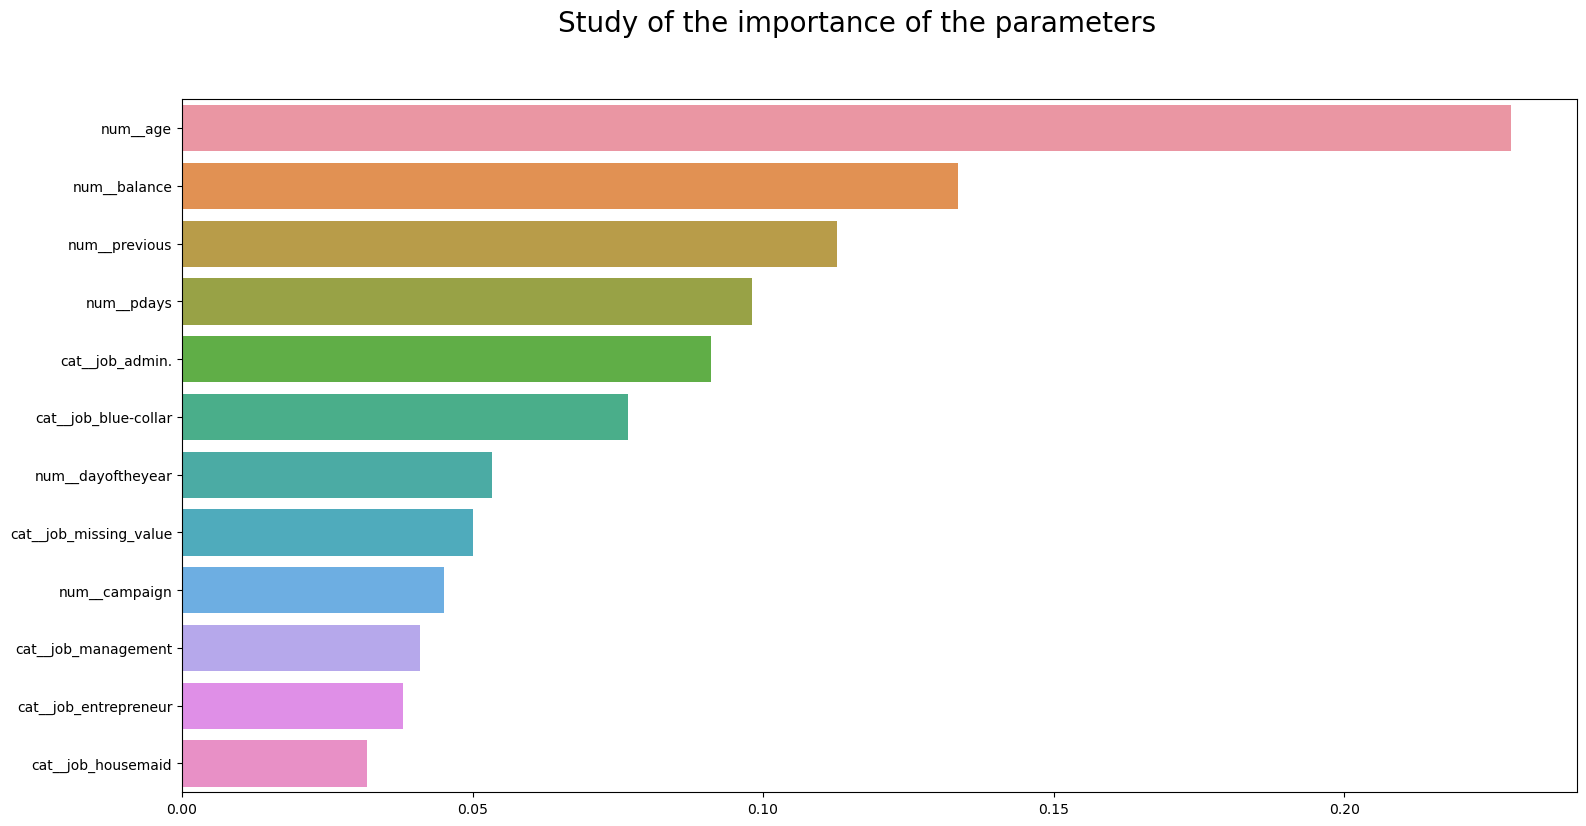

In [188]:
import seaborn as sns
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,9))
fig.suptitle("Study of the importance of the parameters", fontsize=20)

sns.barplot(
    ax=ax,
    x=importances[sorted_indices], 
    y=df2.columns[sorted_indices],


)

Text(1.3, 1, 'TP')

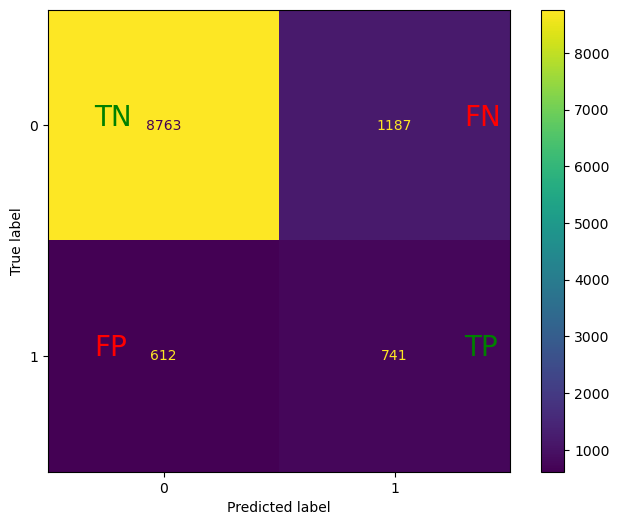

In [189]:
from sklearn.metrics import confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay      
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()
plt.text(-0.3, 0, 'TN', fontsize=20, color='green')
plt.text(1.3, 0, 'FN', fontsize=20, color='red')
plt.text(-0.3, 1, 'FP', fontsize=20, color='red')
plt.text(1.3, 1, 'TP', fontsize=20, color='green')

What is the most important feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [191]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [266]:
df2,df2_final,y_train,y_test=pipe_and_split(42)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [22]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [33]:
df3 = df2[['num__dayoftheyear', 'cat__poutcome_success', 'num__balance',
       'num__age', 'cat__contact_cellular', 'cat__housing_yes',
       'cat__contact_missing_value', 'num__pdays', 'cat__housing_no',
       'cat__poutcome_missing_value', 'num__previous', 'num__campaign']]
df3_final = df2_final[['num__dayoftheyear', 'cat__poutcome_success', 'num__balance',
       'num__age', 'cat__contact_cellular', 'cat__housing_yes',
       'cat__contact_missing_value', 'num__pdays', 'cat__housing_no',
       'cat__poutcome_missing_value', 'num__previous', 'num__campaign']]

In [45]:
param_grid = {
    'max_depth': [  10,20,30,40],
    'n_estimators': [ 40, 100,200,300]
}

In [291]:
#scale_pos_weight = total_negative_examples / total_positive_examples
scale_pos_weight= df['y'].value_counts()[0]/df['y'].value_counts()[1]
#compute_sample_weight("balanced", y_train)

In [47]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)


xgb_model = xgb.XGBClassifier()
xgb_model.fit(df2, y_train, sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=xgb_model ,
                    param_grid=param_grid,
                    cv=10,
                    n_jobs=1,
                    verbose=2,
                   scoring=scoring,
                   return_train_score=True,
                    refit='f1')


In [49]:
grid.fit(df2,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ......................max_depth=10, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   1.4s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=40; total time=   0.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.1s
[CV] END .....................max_depth=10, n_

[CV] END .....................max_depth=30, n_estimators=200; total time=  12.1s
[CV] END .....................max_depth=30, n_estimators=200; total time=  12.0s
[CV] END .....................max_depth=30, n_estimators=200; total time=  11.5s
[CV] END .....................max_depth=30, n_estimators=200; total time=  11.8s
[CV] END .....................max_depth=30, n_estimators=200; total time=  12.0s
[CV] END .....................max_depth=30, n_estimators=200; total time=  11.8s
[CV] END .....................max_depth=30, n_estimators=200; total time=  11.4s
[CV] END .....................max_depth=30, n_estimators=200; total time=  12.0s
[CV] END .....................max_depth=30, n_estimators=200; total time=  11.6s
[CV] END .....................max_depth=30, n_estimators=300; total time=  17.4s
[CV] END .....................max_depth=30, n_estimators=300; total time=  17.1s
[CV] END .....................max_depth=30, n_estimators=300; total time=  16.9s
[CV] END ...................

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [40, 100, 200, 300]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'auc': 'roc_auc',
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [50]:
print(grid.best_score_, grid.best_params_)

0.3866423485381056 {'max_depth': 20, 'n_estimators': 300}


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [51]:
xgb_model_best = xgb.XGBClassifier(max_depth=grid.best_params_['max_depth'], n_estimators=grid.best_params_['n_estimators'])
xgb_model_best.fit(df2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
df3_final

,num__dayoftheyear,cat__poutcome_success,num__balance,num__age,cat__contact_cellular,cat__housing_yes,cat__contact_missing_value,num__pdays,cat__housing_no,cat__poutcome_missing_value,num__previous,num__campaign
0,-0.040679,0.0,0.511220,0.567871,0.0,0.0,1.0,-0.410568,1.0,1.0,-0.239080,-0.568611
1,-1.943988,1.0,-0.173025,-1.970368,1.0,0.0,0.0,1.622847,1.0,0.0,0.587377,0.078059
2,-0.335558,0.0,-0.379991,-0.278209,1.0,0.0,0.0,-0.410568,1.0,1.0,-0.239080,-0.568611
3,-0.201522,0.0,-0.443672,0.003818,0.0,0.0,1.0,-0.410568,1.0,1.0,-0.239080,-0.245276
4,-0.603630,0.0,-0.358432,-0.654244,0.0,1.0,1.0,-0.410568,0.0,1.0,-0.239080,-0.568611
...,...,...,...,...,...,...,...,...,...,...,...,...
11298,0.522271,0.0,4.371254,0.661880,0.0,1.0,0.0,-0.410568,0.0,1.0,-0.239080,2.341402
11299,-0.818087,0.0,0.240573,-0.654244,1.0,1.0,0.0,-0.410568,0.0,1.0,-0.239080,-0.568611
11300,-1.930585,0.0,0.188169,-0.842262,1.0,0.0,0.0,-0.410568,1.0,1.0,-0.239080,-0.245276
11301,-0.871702,0.0,-0.411168,1.319941,1.0,0.0,0.0,-0.410568,1.0,1.0,-0.239080,-0.568611


In [52]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

y_test= encoder.transform(y_test)

y_pred = xgb_model_best.predict(df2_final)
y_pred= encoder.transform(y_pred)
f1 = f1_score(y_test, y_pred)
print('F1 score on test set:', f1)

F1 score on test set: 0.3714146815751093


In [0]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [0]:
# Decision Tree on test set

In [0]:
# Random forest on test set

In [0]:
# XGBoost on test set

What do you notice?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [0]:
# Write your code here

## Rebalance the data

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [0]:
# code here

What do you notice?

*answer here*

You can find some techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

Rebalance the data.

In [0]:
# code here